# Measure cob straightness with linear regression

## Author: Miles Roberts

## Last updated: 2021-03-07

## Goals:
* Load individually cropped cobs
* Measure cob straightness

['cob0_binary_cropped_IMG_8248.jpg', 'cob0_binary_cropped_IMG_8270.jpg', 'cob0_binary_cropped_IMG_8275.jpg', 'cob0_binary_cropped_IMG_8277.jpg', 'cob0_binary_cropped_IMG_8280.jpg', 'cob0_binary_cropped_IMG_8284.jpg', 'cob0_binary_cropped_IMG_8291.jpg', 'cob0_binary_cropped_IMG_8302.jpg', 'cob0_binary_cropped_IMG_8305.jpg', 'cob0_binary_cropped_IMG_8312.jpg', 'cob0_binary_cropped_IMG_8333.jpg', 'cob0_binary_cropped_IMG_8338.jpg', 'cob0_binary_cropped_IMG_8339.jpg', 'cob0_binary_cropped_IMG_8340.jpg', 'cob0_binary_cropped_IMG_8342.jpg', 'cob0_binary_cropped_IMG_8343.jpg', 'cob0_binary_cropped_IMG_8349.jpg', 'cob1_binary_cropped_IMG_8248.jpg', 'cob1_binary_cropped_IMG_8270.jpg', 'cob1_binary_cropped_IMG_8275.jpg', 'cob1_binary_cropped_IMG_8277.jpg', 'cob1_binary_cropped_IMG_8280.jpg', 'cob1_binary_cropped_IMG_8284.jpg', 'cob1_binary_cropped_IMG_8291.jpg', 'cob1_binary_cropped_IMG_8302.jpg', 'cob1_binary_cropped_IMG_8305.jpg', 'cob1_binary_cropped_IMG_8312.jpg', 'cob1_binary_cropped_IMG_83

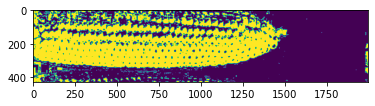

In [1]:
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
from matplotlib.pylab import plt
import numpy as np
from skimage import exposure #histogram equalization
import colorsys #To convert to rbg to hsv color space
import matplotlib.colors as colors
import os #For getting list of files
from scipy import ndimage #For performing erosion and dilation
import matplotlib.colors as colors
from ipywidgets import interactive,fixed #For interactives

from scipy.signal import argrelextrema #To find local maxima in binary corn images, which will delinate individual cobs
from sklearn.linear_model import LinearRegression #To measure cob straightness


fileNames = os.listdir(path='.\individualCobs')
print(fileNames)
os.chdir(path='.\individualCobs')

im = imread("cob1_binary_cropped_IMG_8280.jpg")

plt.imshow(im)

In [2]:
im

Array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   1,   6],
       [255, 255, 255, ...,  23,   0,   0],
       [255, 255, 255, ...,   0,   5,   6]], dtype=uint8)

In [11]:
#Extract locations of only white points (i.e. corn)
plotIm = np.where(im == 255)
plotIm[0]

array([  0,   0,   0, ..., 426, 426, 426], dtype=int64)

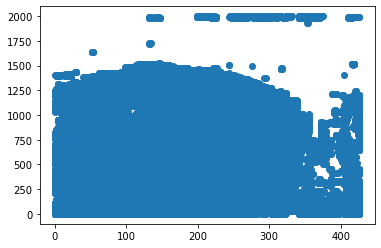

In [13]:
plt.scatter(plotIm[0], plotIm[1])
plt.show()

In [16]:
x = plotIm[0].reshape((-1, 1))
y = plotIm[1]
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.004591777054627544
intercept: 760.0658157500823
slope: [-0.31458043]
